#### Basic preprocessing, nulls, duplicates, fixing names and separating the data columns

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# This line configures matplotlib to show figures embedded in the Jupyter notebook, 
# instead of opening a new window for each figure.
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
sp = pd.read_csv("Student performance (Polytechnic Institute of Portalegre).csv")
sp.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### Handling Missing data/null values

In [3]:
has_nan = sp.isnull().values.any()
print(has_nan)

False


In [4]:
null_values = sp.isnull()
print(null_values)

      Marital status  Application mode  Application order  Course  \
0              False             False              False   False   
1              False             False              False   False   
2              False             False              False   False   
3              False             False              False   False   
4              False             False              False   False   
...              ...               ...                ...     ...   
4419           False             False              False   False   
4420           False             False              False   False   
4421           False             False              False   False   
4422           False             False              False   False   
4423           False             False              False   False   

      Daytime/evening attendance\t  Previous qualification  \
0                            False                   False   
1                            False             

In [5]:
null_count = sp.isnull().sum()
print(null_count)

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

#### This dataset has no null values

In [6]:
duplicates = sp.duplicated().sum()
print(duplicates)

0


#### Duplicate Data: This dataset has no duplicates

In [7]:
sp['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [8]:
# Changing target values to numerical numbers
Target_Status = pd.DataFrame({'Target':['Dropout', 'Graduate', 'Enrolled'], 'Target_status': [1,2,3]})
Target_Status

,Target,Target_status
0,Dropout,1
1,Graduate,2
2,Enrolled,3


In [9]:
clean_sp = sp.merge(Target_Status, on='Target')

In [10]:
# Drop the orinal target collumn
clean_sp.head()
num_sp = clean_sp.drop(columns=['Target'])
num_sp.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [11]:
num_sp = num_sp.rename(columns={'Nacionality': 'Nationality', }) # Fix mispelling

In [12]:
num_sp = num_sp.rename(columns={'Daytime/evening attendance\t': 'Daytime/evening attendance'}) #Getting rid of a tab

In [13]:
# Data Relevant to Q1
spQ1 = num_sp[['Marital status', 'Daytime/evening attendance', 'Nationality', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 
               'Gender', 'Scholarship holder', 'International', 'Age at enrollment', 'Target_status' ]]
spQ1.head()

,Marital status,Daytime/evening attendance,Nationality,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Age at enrollment,Target_status
0,1,1,1,1,0,0,1,1,0,0,20,1
1,1,1,1,1,0,0,0,1,0,0,19,2
2,1,1,1,1,0,0,0,1,0,0,19,1
3,1,1,1,1,0,0,1,0,0,0,20,2
4,2,0,1,0,0,0,1,0,0,0,45,2


In [14]:
# Data Relevant to Q2
spQ2 = num_sp[['Mother\'s qualification', 'Father\'s qualification', 'Mother\'s occupation', 'Father\'s occupation', 'Unemployment rate', 'Inflation rate', 
               'GDP', 'Target_status' ]]
spQ2.head()

,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Unemployment rate,Inflation rate,GDP,Target_status
0,19,12,5,9,10.8,1.4,1.74,1
1,1,3,3,3,13.9,-0.3,0.79,2
2,37,37,9,9,10.8,1.4,1.74,1
3,38,37,5,3,9.4,-0.8,-3.12,2
4,37,38,9,9,13.9,-0.3,0.79,2


In [15]:
# Data Relevant to Q3
spQ3 = num_sp[['Application mode', 'Application order', 'Course', 'Previous qualification', 'Previous qualification (grade)', 'Admission grade', 'Target_status' ]]
spQ3.head()

,Application mode,Application order,Course,Previous qualification,Previous qualification (grade),Admission grade,Target_status
0,17,5,171,1,122.0,127.3,1
1,15,1,9254,1,160.0,142.5,2
2,1,5,9070,1,122.0,124.8,1
3,17,2,9773,1,122.0,119.6,2
4,39,1,8014,1,100.0,141.5,2


In [16]:
# Data Relevant to Q4
spQ4 = num_sp[['Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 
               'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 
               'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 
               'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Target_status' ]]
spQ4.head()

,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target_status
0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,1
1,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,2
2,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,1
3,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,2
4,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,2


In [17]:
spQ1.to_csv('spQ1.csv', index=False)

In [18]:
spQ2.to_csv('spQ2.csv', index=False)

In [19]:
spQ3.to_csv('spQ3.csv', index=False)

In [20]:
spQ4.to_csv('spQ4.csv', index=False)

#### Q1: How do personal characteristics influence the likelihood of dropout?

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, roc_auc_score)

In [22]:
df = pd.read_csv('spQ1.csv')
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (4424, 12)


,Marital status,Daytime/evening attendance,Nationality,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Age at enrollment,Target_status
0,1,1,1,1,0,0,1,1,0,0,20,1
1,1,1,1,1,0,0,0,1,0,0,19,2
2,1,1,1,1,0,0,0,1,0,0,19,1
3,1,1,1,1,0,0,1,0,0,0,20,2
4,2,0,1,0,0,0,1,0,0,0,45,2


In [23]:
df["Dropout"] = df["Target_status"].apply(lambda x: 1 if x == 1 else 0)

df_plot = df.copy()
df_plot["Dropout_label"] = df_plot["Dropout"].map({0: "No Dropout", 1: "Dropout"})

if "Gender" in df_plot.columns:
    df_plot["Gender"] = df_plot["Gender"].map({0: "Female", 1: "Male"})
if "Scholarship holder" in df_plot.columns:
    df_plot["Scholarship holder"] = df_plot["Scholarship holder"].map({0: "No", 1: "Yes"})
if "International" in df_plot.columns:
    df_plot["International"] = df_plot["International"].map({0: "Local", 1: "International"})
if "Educational special needs" in df_plot.columns:
    df_plot["Educational special needs"] = df_plot["Educational special needs"].map({0: "No", 1: "Yes"})
if "Debtor" in df_plot.columns:
    df_plot["Debtor"] = df_plot["Debtor"].map({0: "No", 1: "Yes"})
if "Tuition fees up to date" in df_plot.columns:
    df_plot["Tuition fees up to date"] = df_plot["Tuition fees up to date"].map({0: "No", 1: "Yes"})


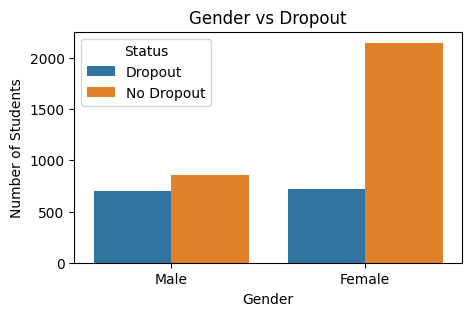

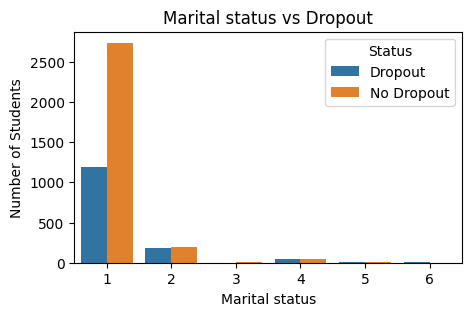

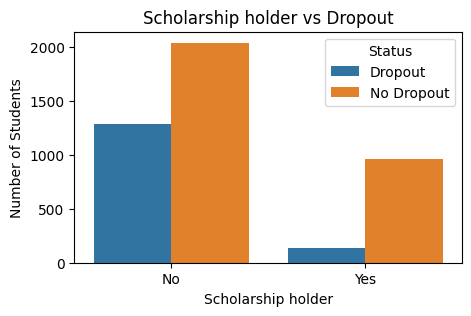

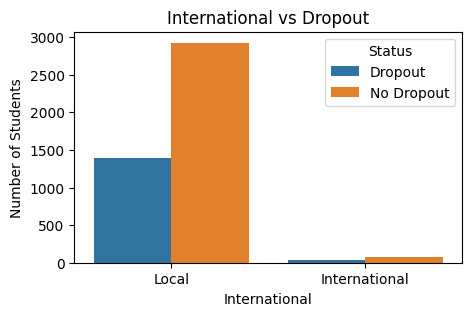

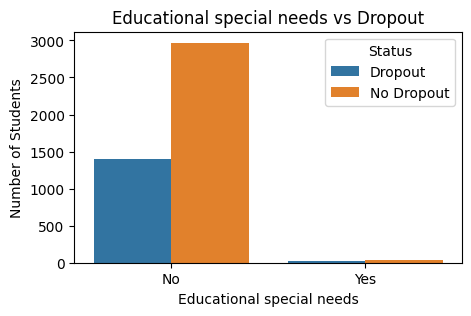

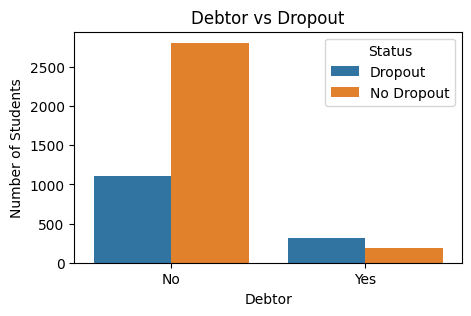

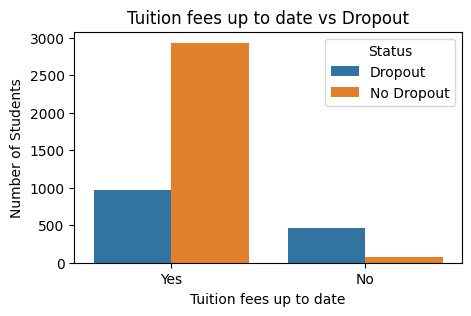

In [24]:
features_for_eda = ["Gender", "Marital status", "Scholarship holder", "International", "Educational special needs", "Debtor", "Tuition fees up to date"]

for col in features_for_eda:
    if col in df_plot.columns:
        plt.figure(figsize = (5,3))
        sns.countplot(data = df_plot, x = col, hue = "Dropout_label")
        plt.title(f"{col} vs Dropout")
        plt.xlabel(col)
        plt.ylabel("Number of Students")
        plt.legend(title = "Status")
        plt.show()

In [25]:
features = ["Gender", "Age at enrollment", "Marital status", "International", "Educational special needs", "Scholarship holder", "Debtor"]
X = df[features].copy()
y = pd.to_numeric(df["Target_status"], errors = "coerce").fillna(0).astype(int)

print("Features:", features)
print("Target distribution:\n", y.value_counts())

Features: ['Gender', 'Age at enrollment', 'Marital status', 'International', 'Educational special needs', 'Scholarship holder', 'Debtor']
Target distribution:
 Target_status
2    2209
1    1421
3     794
Name: count, dtype: int64


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

numeric_cols = X.select_dtypes(include = [np.number]).columns.tolist()
categorical_cols = [c for c in X.columns if c not in numeric_cols]

In [27]:
num_pipe = Pipeline([('imputer', SimpleImputer(strategy = 'median'))])
cat_pipe = Pipeline([('imputer', SimpleImputer(strategy = 'most_frequent')), ('ohe', OneHotEncoder(handle_unknown = 'ignore'))])

pre = ColumnTransformer([('num', num_pipe, numeric_cols), ('cat', cat_pipe, categorical_cols)], sparse_threshold = 0)

In [28]:
log = Pipeline([('pre', pre), ('clf', LogisticRegression(max_iter = 1000, class_weight = 'balanced'))])

rf = Pipeline([('pre', pre), ('clf', RandomForestClassifier(n_estimators = 200, random_state = 42, class_weight = 'balanced'))])

log.fit(X_train, y_train)
rf.fit(X_train, y_train)

,steps,"[('pre', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [29]:
y_pred_log = log.predict(X_test)
print("\n=== Logistic Regression Results ===")
print(classification_report(y_test, y_pred_log))

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)
print("\n=== Random Forest Results ===")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC (ovr):", roc_auc_score(y_test, y_proba_rf, multi_class = 'ovr'))
print("ROC AUC (ovo):", roc_auc_score(y_test, y_proba_rf, multi_class = 'ovo'))


=== Logistic Regression Results ===
              precision    recall  f1-score   support

           1       0.59      0.56      0.57       284
           2       0.75      0.42      0.54       442
           3       0.23      0.52      0.32       159

    accuracy                           0.48       885
   macro avg       0.52      0.50      0.48       885
weighted avg       0.60      0.48      0.51       885


=== Random Forest Results ===
              precision    recall  f1-score   support

           1       0.53      0.48      0.50       284
           2       0.68      0.58      0.63       442
           3       0.20      0.31      0.24       159

    accuracy                           0.50       885
   macro avg       0.47      0.46      0.46       885
weighted avg       0.55      0.50      0.52       885

ROC AUC (ovr): 0.6584371749315986
ROC AUC (ovo): 0.643772783427373


In [30]:
log_reg_model = log.named_steps['clf']
feature_names = numeric_cols
if categorical_cols:
    ohe = log.named_steps['pre'].named_transformers_['cat'].named_steps['ohe']
    cat_names = ohe.get_feature_names_out(categorical_cols).tolist()
    feature_names = numeric_cols + cat_names

coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": log_reg_model.coef_[0]}).sort_values(by = "Coefficient", ascending = False)

print("\n=== Logistic Regression Coefficients ===")
display(coef_df)


=== Logistic Regression Coefficients ===


,Feature,Coefficient
6,Debtor,0.790888
0,Gender,0.371686
4,Educational special needs,0.218488
1,Age at enrollment,0.041457
2,Marital status,-0.070019
3,International,-0.397704
5,Scholarship holder,-0.565018



=== Top Feature Importances (Random Forest) ===
Age at enrollment            0.579881
Scholarship holder           0.146233
Debtor                       0.088040
Gender                       0.079575
Marital status               0.068236
International                0.023293
Educational special needs    0.014742
dtype: float64


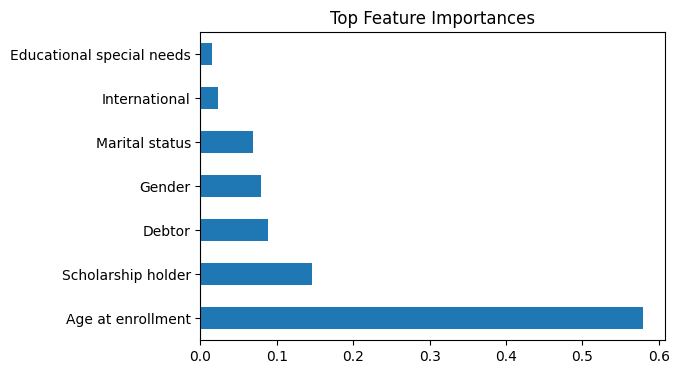

In [31]:
importances = rf.named_steps['clf'].feature_importances_
feat_imp = pd.Series(importances, index = feature_names).sort_values(ascending = False)

print("\n=== Top Feature Importances (Random Forest) ===")
print(feat_imp.head(10))

feat_imp.head(10).plot(kind = 'barh', figsize = (6,4), title = "Top Feature Importances")
plt.show()

#### Q2: To what extent do parental education/occupation and home-country economic indicators affect students’ academic performance and persistence?

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
spQ2 = pd.read_csv("spQ2.csv")
spQ2.head()

,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Unemployment rate,Inflation rate,GDP,Target_status
0,19,12,5,9,10.8,1.4,1.74,1
1,1,3,3,3,13.9,-0.3,0.79,2
2,37,37,9,9,10.8,1.4,1.74,1
3,38,37,5,3,9.4,-0.8,-3.12,2
4,37,38,9,9,13.9,-0.3,0.79,2


<Axes: >

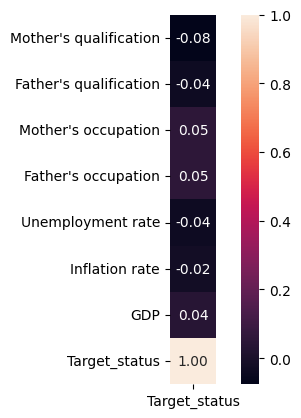

In [33]:
sns.heatmap(spQ2.corr()[["Target_status"]], square=True, annot=True, fmt=".2f")

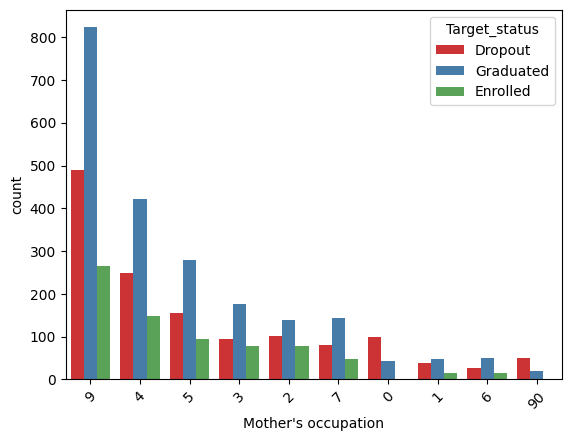

In [34]:
top10 = spQ2["Mother\'s occupation"].value_counts().nlargest(10).index

ax = sns.countplot(
    x="Mother\'s occupation",
    hue="Target_status",
    data=spQ2[spQ2["Mother\'s occupation"].isin(top10)],
    order=top10,                # keep top 10 order
    palette="Set1"              # more contrasting colors
)
# Rename legend title and labels
ax.legend(title="Target_status", labels=["Dropout", "Graduated", "Enrolled"])

plt.xticks(rotation=45)
plt.show()

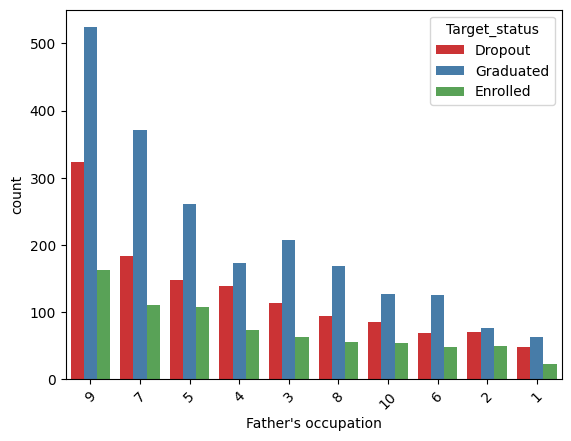

In [35]:
top10 = spQ2["Father\'s occupation"].value_counts().nlargest(10).index

ax = sns.countplot(
    x="Father\'s occupation",
    hue="Target_status",
    data=spQ2[spQ2["Father\'s occupation"].isin(top10)],
    order=top10,                # keep top 10 order
    palette="Set1"              # more contrasting colors
)
# Rename legend title and labels
ax.legend(title="Target_status", labels=["Dropout", "Graduated", "Enrolled"])

plt.xticks(rotation=45)
plt.show()

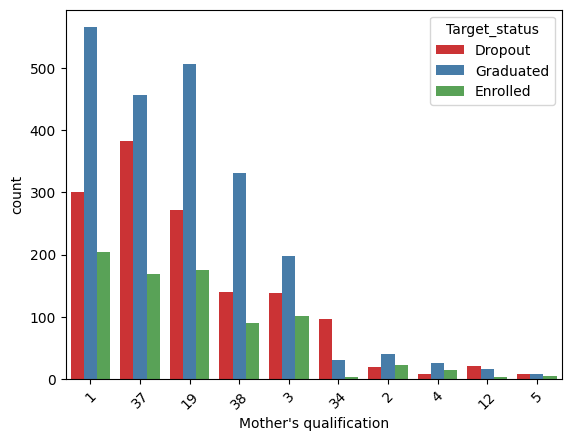

In [36]:
top10 = spQ2["Mother\'s qualification"].value_counts().nlargest(10).index

ax = sns.countplot(
    x="Mother\'s qualification",
    hue="Target_status",
    data=spQ2[spQ2["Mother\'s qualification"].isin(top10)],
    order=top10,                # keep top 10 order
    palette="Set1"              # more contrasting colors
)
# Rename legend title and labels
ax.legend(title="Target_status", labels=["Dropout", "Graduated", "Enrolled"])

plt.xticks(rotation=45)
plt.show()

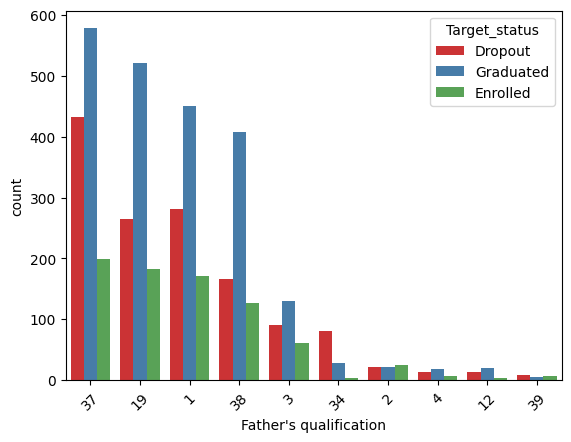

In [37]:
top10 = spQ2["Father\'s qualification"].value_counts().nlargest(10).index

ax = sns.countplot(
    x="Father\'s qualification",
    hue="Target_status",
    data=spQ2[spQ2["Father\'s qualification"].isin(top10)],
    order=top10,                # keep top 10 order
    palette="Set1"              # more contrasting colors
)
# Rename legend title and labels
ax.legend(title="Target_status", labels=["Dropout", "Graduated", "Enrolled"])
plt.xticks(rotation=45)
plt.show()

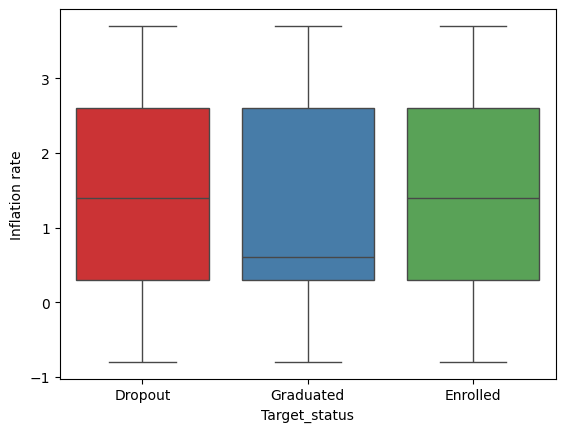

In [38]:
ax = sns.boxplot(
    x="Target_status",
    y="Inflation rate",
    data=spQ2,
    palette="Set1"
)
# Rename labels on x axis
ax.set_xticklabels(["Dropout", "Graduated", "Enrolled"])
plt.show()

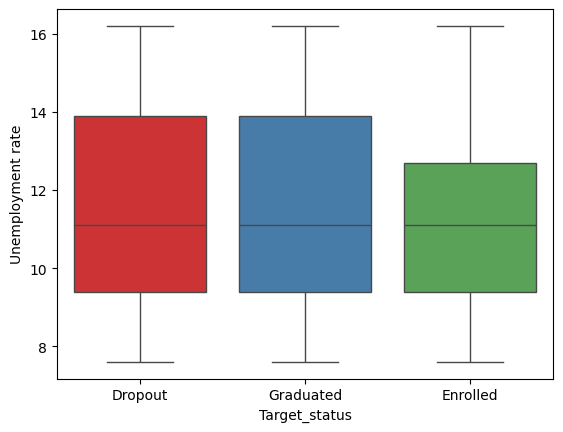

In [39]:
ax = sns.boxplot(
    x="Target_status",
    y="Unemployment rate",
    data=spQ2,
    palette="Set1"
)
ax.set_xticklabels(["Dropout", "Graduated", "Enrolled"])
plt.show()

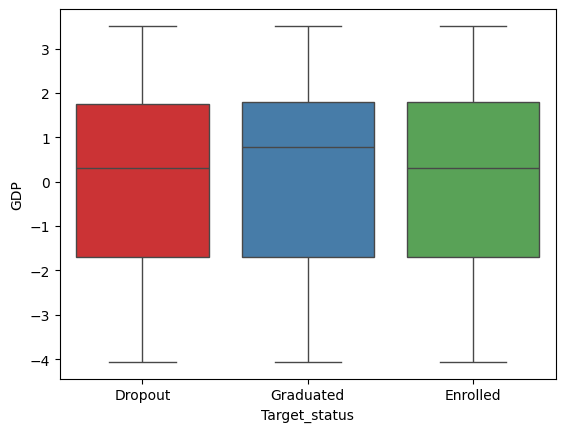

In [40]:
ax = sns.boxplot(
    x="Target_status",
    y="GDP",
    data=spQ2,
    palette="Set1"
)
ax.set_xticklabels(["Dropout", "Graduated", "Enrolled"])
#plt.savefig('GR.png', format='png', dpi=300)
plt.show()

In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [42]:
encoder = LabelEncoder()
spQ2['Target_status'] = encoder.fit_transform(spQ2['Target_status'])

X = spQ2.drop("Target_status", axis=1)     # drop labels from original data
y = spQ2["Target_status"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# check shapes after splitting
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3318, 7)
(3318,)
(1106, 7)
(1106,)


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [44]:
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [45]:
y_pred = rf_classifier.predict(X_test)

In [46]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.37      0.34      0.35       340
           1       0.55      0.64      0.59       565
           2       0.29      0.20      0.24       201

    accuracy                           0.47      1106
   macro avg       0.40      0.39      0.39      1106
weighted avg       0.45      0.47      0.45      1106



#### Q3: Does the method of admission predict differences in student success or dropout risk?

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('spQ3.csv')
df.head()

,Application mode,Application order,Course,Previous qualification,Previous qualification (grade),Admission grade,Target_status
0,17,5,171,1,122.0,127.3,1
1,15,1,9254,1,160.0,142.5,2
2,1,5,9070,1,122.0,124.8,1
3,17,2,9773,1,122.0,119.6,2
4,39,1,8014,1,100.0,141.5,2


In [48]:
df.shape

(4424, 7)

In [49]:
# Set labels 1 = Dropout, 2 = Enrolled, 3 = Graduate
target_map = {1:"Dropout", 2:"Enrolled", 3:"Graduate"}
df["Status"] = df["Target_status"].map(target_map)

sns.set(style="whitegrid")


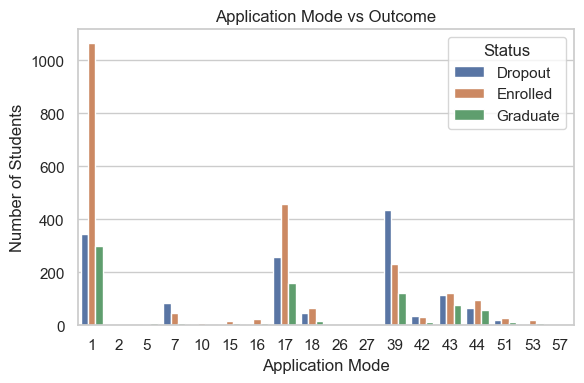

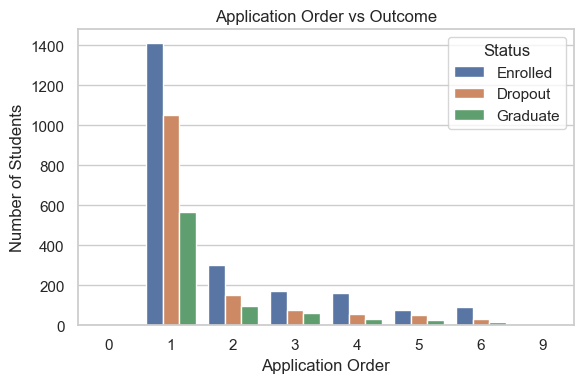

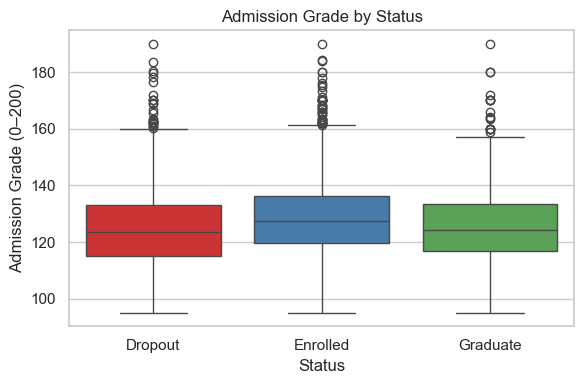

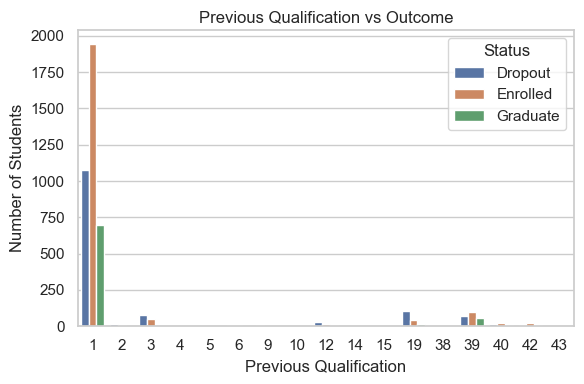

In [50]:
# Figure 3.1 – Application Mode vs Outcome

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Application mode", hue="Status")
plt.title("Application Mode vs Outcome")
plt.xlabel("Application Mode")
plt.ylabel("Number of Students")
plt.legend(title="Status")
plt.tight_layout()
plt.show()

# Figure 3.2 – Application Order vs Outcome
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Application order", hue="Status")
plt.title("Application Order vs Outcome")
plt.xlabel("Application Order")
plt.ylabel("Number of Students")
plt.legend(title="Status")
plt.tight_layout()
plt.show()

# Figure 3.3 – Admission Grade by Status
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Status", y="Admission grade", palette="Set1")
plt.title("Admission Grade by Status")
plt.xlabel("Status")
plt.ylabel("Admission Grade (0–200)")
plt.tight_layout()
plt.show()

# Figure 3.4 – Previous Qualification vs Outcome
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Previous qualification", hue="Status")
plt.title("Previous Qualification vs Outcome")
plt.xlabel("Previous Qualification")
plt.ylabel("Number of Students")
plt.legend(title="Status")
plt.tight_layout()
plt.show()



Logistic Regression Results:
              precision    recall  f1-score   support

           1      0.527     0.514     0.520       284
           2      0.686     0.627     0.655       442
           3      0.319     0.409     0.358       159

    accuracy                          0.551       885
   macro avg      0.510     0.517     0.511       885
weighted avg      0.569     0.551     0.558       885


Random Forest Results:
              precision    recall  f1-score   support

           1      0.463     0.458     0.460       284
           2      0.614     0.695     0.652       442
           3      0.308     0.201     0.243       159

    accuracy                          0.530       885
   macro avg      0.461     0.451     0.452       885
weighted avg      0.510     0.530     0.517       885



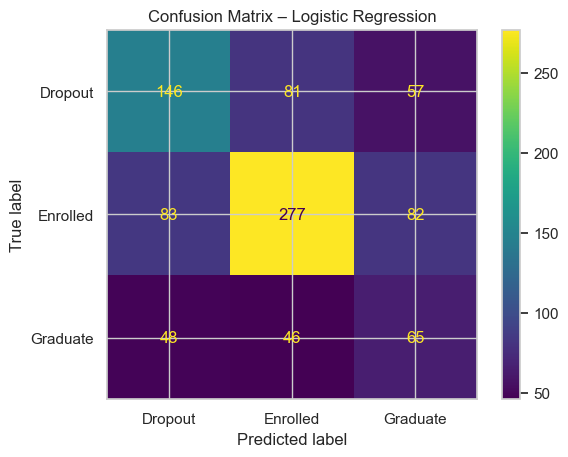

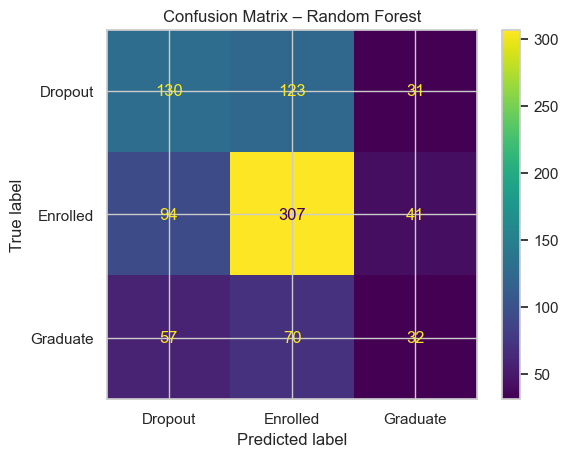

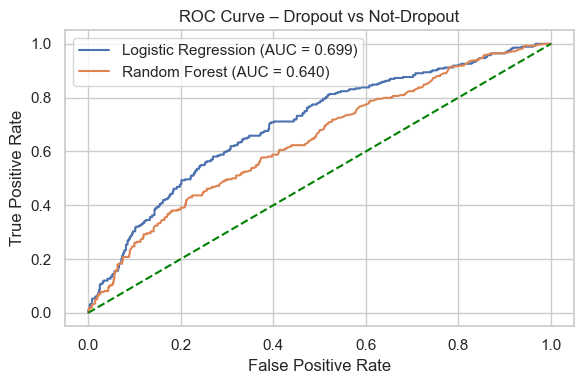


Top Admission Predictors (Random Forest):
Admission grade                   0.360839
Previous qualification (grade)    0.255725
Application order                 0.068604


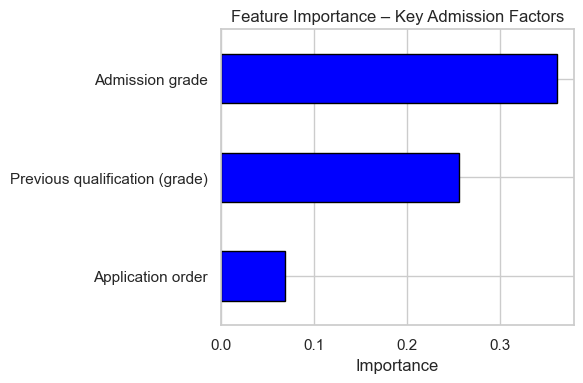

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Features (admission related)
features_q3 = [
    "Application mode", "Application order", "Course",
    "Previous qualification", "Previous qualification (grade)",
    "Admission grade"
]

X = df[features_q3].copy()
y = df["Target_status"].astype(int)   # 1=Dropout, 2=Enrolled, 3=Graduate

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Separate numeric & categorical
num_cols = ["Application order", "Previous qualification (grade)", "Admission grade"]
cat_cols = [c for c in features_q3 if c not in num_cols]

# Preprocessing
preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imp", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), num_cols),
        ("cat", Pipeline([
            ("imp", SimpleImputer(strategy="most_frequent")),
            ("ohe", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols),
    ],
    sparse_threshold=0
)

# Models
log_clf = Pipeline([
    ("prep", preprocess),
    ("clf", LogisticRegression(max_iter=1500, class_weight="balanced", multi_class="ovr"))
])

rf_clf = Pipeline([
    ("prep", preprocess),
    ("clf", RandomForestClassifier(
        n_estimators=300, random_state=42, class_weight="balanced_subsample", n_jobs=-1
    ))
])

# Train models
log_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

# Evaluate - classification report
print("Logistic Regression Results:")
y_pred_log = log_clf.predict(X_test)
print(classification_report(y_test, y_pred_log, digits=3))

print("\nRandom Forest Results:")
y_pred_rf = rf_clf.predict(X_test)
print(classification_report(y_test, y_pred_rf, digits=3))

# Confusion Matrix 
ConfusionMatrixDisplay.from_estimator(log_clf, X_test, y_test, display_labels=["Dropout","Enrolled","Graduate"])
plt.title("Confusion Matrix – Logistic Regression")
plt.show()

ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, y_test, display_labels=["Dropout","Enrolled","Graduate"])
plt.title("Confusion Matrix – Random Forest")
plt.show()

# ROC Curve - Logistic Regression vs Random Forest

y_bin = (y_test == 1).astype(int)  # Dropout=1, Enrolled/Graduate=0

log_pos_idx = np.where(log_clf.named_steps["clf"].classes_ == 1)[0][0]
rf_pos_idx  = np.where(rf_clf.named_steps["clf"].classes_  == 1)[0][0]

# Proabability
proba_log = log_clf.predict_proba(X_test)[:, log_pos_idx]
proba_rf  = rf_clf.predict_proba(X_test)[:, rf_pos_idx]

fpr_log, tpr_log, _ = roc_curve(y_bin, proba_log)
fpr_rf,  tpr_rf,  _ = roc_curve(y_bin, proba_rf)

auc_log = roc_auc_score(y_bin, proba_log)
auc_rf  = roc_auc_score(y_bin, proba_rf)

plt.figure(figsize=(6,4))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.3f})")
plt.plot(fpr_rf,  tpr_rf,  label=f"Random Forest (AUC = {auc_rf:.3f})")
plt.plot([0,1], [0,1], "--", color="green")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Dropout vs Not-Dropout")
plt.legend()
plt.tight_layout(); plt.show()



# Feature Importance (Random Forest)
ohe = rf_clf.named_steps["prep"].named_transformers_["cat"].named_steps["ohe"]
cat_names = ohe.get_feature_names_out(cat_cols).tolist()
all_names = num_cols + cat_names

importances = rf_clf.named_steps["clf"].feature_importances_
fi = pd.Series(importances, index=all_names)

# Taking only those with high influence 
keep_features = [
    "Admission grade",
    "Previous qualification (grade)",
    "Application order"
]
fi_simplified = fi[fi.index.isin(keep_features)].sort_values(ascending=False)

print("\nTop Admission Predictors (Random Forest):")
print(fi_simplified.to_string())

plt.figure(figsize=(6,4))
fi_simplified.sort_values().plot(kind="barh", color="blue", edgecolor="black")
plt.title("Feature Importance – Key Admission Factors")
plt.xlabel("Importance")
plt.ylabel("")
plt.tight_layout()
plt.show()


#### Question 4: How do patterns of course enrollment, evaluations, approvals, semester grade and missing grades in the first two semesters influence dropout probability or long-term success?

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings

warnings.filterwarnings("ignore")

In [53]:
df = pd.read_csv("spQ4.csv")
df

,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target_status
0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,1
1,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,2
2,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,1
3,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,2
4,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,2
4420,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,1
4421,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,1
4422,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,2


In [54]:
# Map target status into labels for clarity
target_map = {1: "Dropout", 2: "Enrolled", 3: "Graduate"}
df['Target_status_label'] = df['Target_status'].map(target_map)

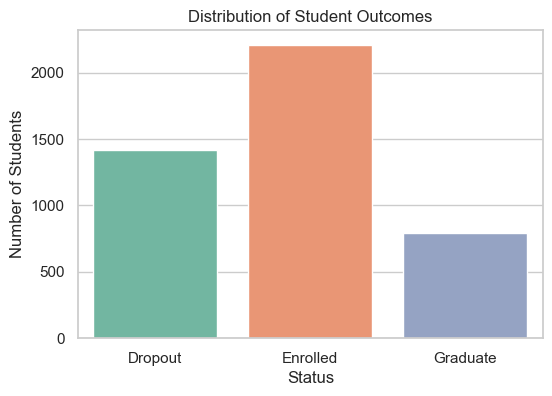

In [55]:
# Exploratory Data Analysis (EDA)
# 1. Distribution of student outcomes
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Target_status_label', hue='Target_status_label', 
              palette="Set2", legend=False)
plt.title("Distribution of Student Outcomes")
plt.ylabel("Number of Students")
plt.xlabel("Status")
plt.show()

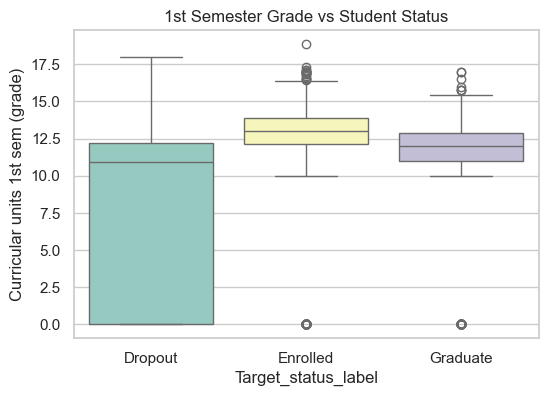

In [56]:
# 2. Boxplot: 1st Semester Grade vs Status
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Target_status_label', 
            y='Curricular units 1st sem (grade)', 
            hue='Target_status_label', palette="Set3", legend=False)
plt.title("1st Semester Grade vs Student Status")
plt.show()

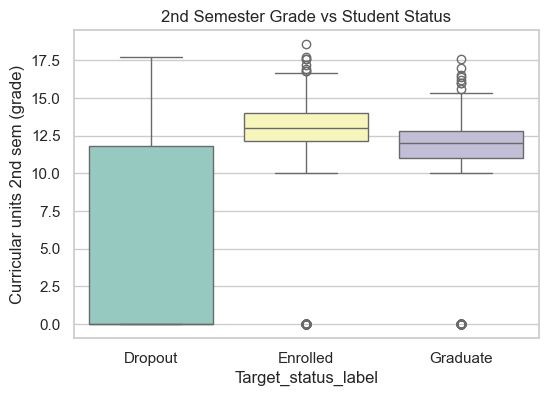

In [57]:
# 3. Boxplot: 2nd Semester Grade vs Status
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Target_status_label', 
            y='Curricular units 2nd sem (grade)', 
            hue='Target_status_label', palette="Set3", legend=False)
plt.title("2nd Semester Grade vs Student Status")
plt.show()

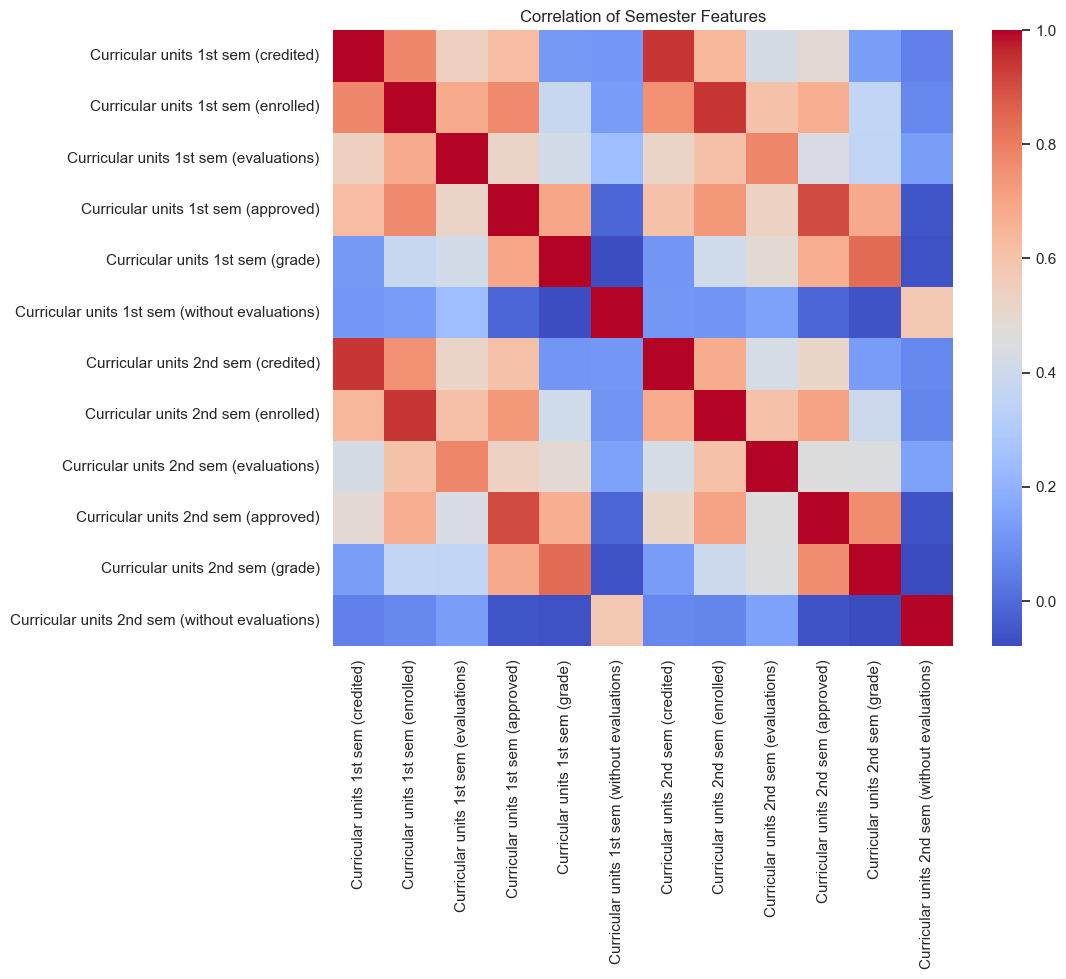

In [58]:
# 4. Correlation heatmap of semester features
sem_features = [
    'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)'
]

plt.figure(figsize=(10,8))
sns.heatmap(df[sem_features].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation of Semester Features")
plt.show()

In [59]:
# Predictive Modelling
# Define features (X) and target (y)
X = df[sem_features]
y = df['Target_status']   # encoded as 1=Dropout, 2=Enrolled, 3=Graduate

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Build Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [60]:
# Classification Report
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=target_map.values()))

=== Classification Report ===
              precision    recall  f1-score   support

     Dropout       0.71      0.74      0.73       441
    Enrolled       0.78      0.86      0.81       642
    Graduate       0.41      0.27      0.33       245

    accuracy                           0.71      1328
   macro avg       0.63      0.62      0.62      1328
weighted avg       0.69      0.71      0.70      1328



In [61]:
# Confusion Matrix
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

=== Confusion Matrix ===
[[326  65  50]
 [ 46 549  47]
 [ 86  92  67]]


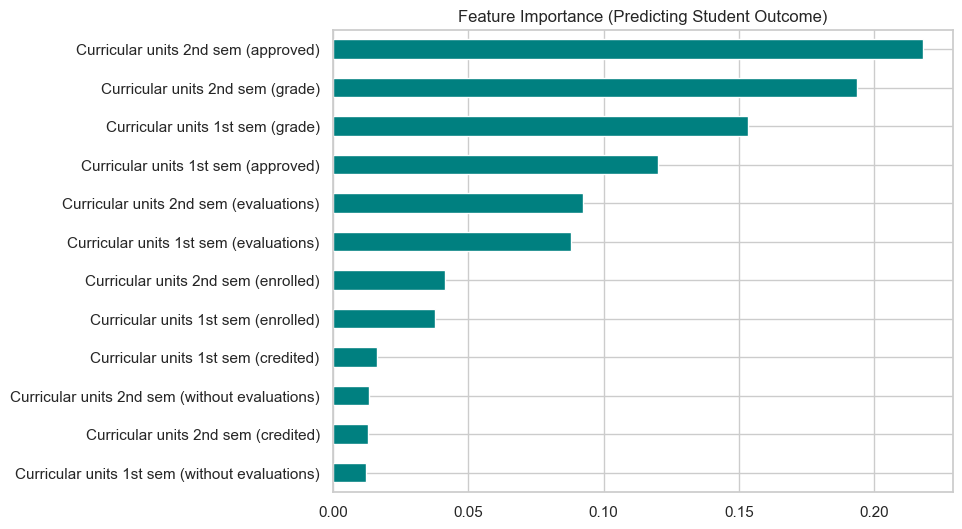

In [62]:
# Feature Importance
importances = pd.Series(model.feature_importances_, index=sem_features).sort_values(ascending=True)

plt.figure(figsize=(8,6))
importances.plot(kind='barh', color="teal")
plt.title("Feature Importance (Predicting Student Outcome)")
plt.show()